In [1]:
import os
import re as regex
import numpy as np
import pandas as pd
import seaborn as sns
import matplotlib as mpl
import matplotlib.pyplot as plt
from sklearn.preprocessing import Imputer
from sklearn.model_selection import train_test_split

In [2]:
reviews_data=pd.read_csv("C:\\Users\\Sathish Reddy\\Desktop\\R-project\\working_dr\\reviews.csv")

In [3]:
reviews_data.head(3)

,listing_id,id,date,reviewer_id,reviewer_name,comments
0,2265,963,2009-03-17,7538,Niall,I stayed here during SXSW and had a really ple...
1,2265,1057,2009-03-22,10029,Michael,"Great place, close enough to everything downto..."
2,2265,200418,2011-03-16,61677,Gustaf,We had a great time in Austin staying at Paddy...


In [4]:
reviews_data.drop(['reviewer_id','reviewer_name','comments'],axis=1,inplace=True)

In [5]:
reviews_data.head(3)

,listing_id,id,date
0,2265,963,2009-03-17
1,2265,1057,2009-03-22
2,2265,200418,2011-03-16


In [6]:
reviews_data.rename({'id':'review_count'},axis=1,inplace=True)

In [7]:
reviews_data.head(3)

,listing_id,review_count,date
0,2265,963,2009-03-17
1,2265,1057,2009-03-22
2,2265,200418,2011-03-16


In [8]:
reviews_data.review_count=1

In [9]:
reviews_data.head()

,listing_id,review_count,date
0,2265,1,2009-03-17
1,2265,1,2009-03-22
2,2265,1,2011-03-16
3,2265,1,2012-03-15
4,2265,1,2012-03-19


In [10]:
print("The first dataset has {} rows and {} columns.".format(*reviews_data.shape))

The first dataset has 370044 rows and 3 columns.


In [11]:
print("It contains {} duplicates.".format(reviews_data.duplicated().sum()))

It contains 3178 duplicates.


In [12]:
reviews_data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 370044 entries, 0 to 370043
Data columns (total 3 columns):
listing_id      370044 non-null int64
review_count    370044 non-null int64
date            370044 non-null object
dtypes: int64(2), object(1)
memory usage: 8.5+ MB


In [13]:
reviews_data.date = pd.to_datetime(reviews_data.date, format="%Y-%m-%d")

In [14]:
reviews_data.head()

,listing_id,review_count,date
0,2265,1,2009-03-17
1,2265,1,2009-03-22
2,2265,1,2011-03-16
3,2265,1,2012-03-15
4,2265,1,2012-03-19


In [15]:
count_2019_20 = reviews_data[reviews_data["date"].isin(pd.date_range('2019-03-01', '2020-02-29'))]
print("The dataset 2019/2020 has {} reviews and {} columns.".format(*count_2019_20.shape))

The dataset 2019/2020 has 144559 reviews and 3 columns.


In [16]:
count_2019_20 = count_2019_20.set_index('date').sort_index()

In [17]:
count_2019_20

,listing_id,review_count
date,,
2019-03-01,3432834,1
2019-03-01,28511447,1
2019-03-01,214795,1
2019-03-01,20314657,1
2019-03-01,214795,1
...,...,...
2020-02-29,33247800,1
2020-02-29,15799378,1
2020-02-29,5083004,1


In [18]:
count_2019_20_monthly = count_2019_20.groupby([pd.Grouper(freq='M'), 'listing_id'])['review_count']\
                                         .agg({'review_count':{'reviews_per_month':'count'}})\
                                         .reset_index()

C:\ProgramData\Anaconda3\lib\site-packages\ipykernel_launcher.py:2: FutureWarning: using a dict on a Series for aggregation
is deprecated and will be removed in a future version. Use                 named aggregation instead.

    >>> grouper.agg(name_1=func_1, name_2=func_2)

  
C:\ProgramData\Anaconda3\lib\site-packages\pandas\core\groupby\generic.py:930: FutureWarning: using a dict on a Series for aggregation
is deprecated and will be removed in a future version. Use                 named aggregation instead.

    >>> grouper.agg(name_1=func_1, name_2=func_2)

  results[name] = obj.aggregate(func)


In [19]:
count_2019_20_monthly.head()

,date,listing_id,review_count
,,,reviews_per_month
0,2019-03-31,2265,1
1,2019-03-31,5456,3
2,2019-03-31,5769,2
3,2019-03-31,6413,4
4,2019-03-31,6448,2


In [20]:
count_2019_20_monthly.columns

MultiIndex([(        'date',                  ''),
            (  'listing_id',                  ''),
            ('review_count', 'reviews_per_month')],
           )

In [21]:
count_2019_20_monthly.columns = ['date', 'listing_id', 'reviews_per_month']

# set date as index again
count_2019_20_monthly.set_index('date', inplace=True)

# check again
count_2019_20_monthly.head(2)

,listing_id,reviews_per_month
date,,
2019-03-31,2265,1
2019-03-31,5456,3


In [22]:
count_2019_20_monthly = count_2019_20_monthly.reset_index()

In [23]:
count_2019_20_monthly.columns

Index(['date', 'listing_id', 'reviews_per_month'], dtype='object')

In [24]:
count_2019_20_monthly = pd.DataFrame(count_2019_20_monthly.groupby('listing_id')['reviews_per_month'].mean()\
                                                          .reset_index())

In [25]:
count_2019_20_monthly

,listing_id,reviews_per_month
0,2265,1.000000
1,5456,4.500000
2,5769,2.428571
3,6413,2.300000
4,6448,2.888889
...,...,...
7160,42518813,1.000000
7161,42538483,1.000000
7162,42541133,1.000000
7163,42586551,1.000000


In [25]:
list_data=pd.read_csv("C:\\Users\\Sathish Reddy\\Desktop\\R-project\\working_dr\\listings.csv")

C:\ProgramData\Anaconda3\lib\site-packages\IPython\core\interactiveshell.py:3058: DtypeWarning: Columns (61,62) have mixed types. Specify dtype option on import or set low_memory=False.
  interactivity=interactivity, compiler=compiler, result=result)


In [26]:
list_data.head()

,id,listing_url,scrape_id,last_scraped,name,summary,space,description,experiences_offered,neighborhood_overview,...,instant_bookable,is_business_travel_ready,cancellation_policy,require_guest_profile_picture,require_guest_phone_verification,calculated_host_listings_count,calculated_host_listings_count_entire_homes,calculated_host_listings_count_private_rooms,calculated_host_listings_count_shared_rooms,reviews_per_month
0,2265,https://www.airbnb.com/rooms/2265,20200317143754,2020-03-17,Zen-East in the Heart of Austin (monthly rental),Zen East is situated in a vibrant & diverse mu...,This colorful and clean 1923 house was complet...,Zen East is situated in a vibrant & diverse mu...,none,NaN,...,f,f,strict_14_with_grace_period,f,f,3,2,1,0,0.18
1,5245,https://www.airbnb.com/rooms/5245,20200317143754,2020-03-17,"Eco friendly, Colorful, Clean, Cozy monthly share",Situated in a vibrant & diverse multicultural ...,"This green, colorful, clean and cozy house was...",Situated in a vibrant & diverse multicultural ...,none,NaN,...,f,f,strict_14_with_grace_period,f,f,3,2,1,0,0.07
2,5456,https://www.airbnb.com/rooms/5456,20200317143754,2020-03-17,"Walk to 6th, Rainey St and Convention Ctr",Great central location for walking to Convent...,Cute Private Studio apartment located in Willo...,Great central location for walking to Convent...,none,My neighborhood is ideally located if you want...,...,f,f,strict_14_with_grace_period,f,t,1,1,0,0,3.94
3,5769,https://www.airbnb.com/rooms/5769,20200317143754,2020-03-17,NW Austin Room,NaN,Looking for a comfortable inexpensive room to ...,Looking for a comfortable inexpensive room to ...,none,Quiet neighborhood with lots of trees and good...,...,f,f,moderate,t,t,1,0,1,0,2.12
4,6413,https://www.airbnb.com/rooms/6413,20200317143754,2020-03-17,Gem of a Studio near Downtown,"Great studio apartment, perfect for couples or...",!!!!! SXSW info !!!!! Presently open (again!) ...,"Great studio apartment, perfect for couples or...",none,Travis Heights is one of the oldest neighborho...,...,t,f,strict_14_with_grace_period,f,f,1,1,0,0,0.90


In [27]:
count_2019_20_monthly.head()

,listing_id,reviews_per_month
0,2265,1.000000
1,5456,4.500000
2,5769,2.428571
3,6413,2.300000
4,6448,2.888889


In [29]:
data_set = pd.merge(count_2019_20_monthly, list_data, 
              left_on='listing_id', right_on='id')

In [30]:
data_set.head()

,listing_id,reviews_per_month_x,id,listing_url,scrape_id,last_scraped,name,summary,space,description,...,instant_bookable,is_business_travel_ready,cancellation_policy,require_guest_profile_picture,require_guest_phone_verification,calculated_host_listings_count,calculated_host_listings_count_entire_homes,calculated_host_listings_count_private_rooms,calculated_host_listings_count_shared_rooms,reviews_per_month_y
0,2265,1.000000,2265,https://www.airbnb.com/rooms/2265,20200317143754,2020-03-17,Zen-East in the Heart of Austin (monthly rental),Zen East is situated in a vibrant & diverse mu...,This colorful and clean 1923 house was complet...,Zen East is situated in a vibrant & diverse mu...,...,f,f,strict_14_with_grace_period,f,f,3,2,1,0,0.18
1,5456,4.500000,5456,https://www.airbnb.com/rooms/5456,20200317143754,2020-03-17,"Walk to 6th, Rainey St and Convention Ctr",Great central location for walking to Convent...,Cute Private Studio apartment located in Willo...,Great central location for walking to Convent...,...,f,f,strict_14_with_grace_period,f,t,1,1,0,0,3.94
2,5769,2.428571,5769,https://www.airbnb.com/rooms/5769,20200317143754,2020-03-17,NW Austin Room,NaN,Looking for a comfortable inexpensive room to ...,Looking for a comfortable inexpensive room to ...,...,f,f,moderate,t,t,1,0,1,0,2.12
3,6413,2.300000,6413,https://www.airbnb.com/rooms/6413,20200317143754,2020-03-17,Gem of a Studio near Downtown,"Great studio apartment, perfect for couples or...",!!!!! SXSW info !!!!! Presently open (again!) ...,"Great studio apartment, perfect for couples or...",...,t,f,strict_14_with_grace_period,f,f,1,1,0,0,0.90
4,6448,2.888889,6448,https://www.airbnb.com/rooms/6448,20200317143754,2020-03-17,Secluded Studio in 78704 (Zilker),Our garage apartment provides a private space ...,Stay in our lovely 1 bedroom garage apartment ...,Our garage apartment provides a private space ...,...,t,f,strict_14_with_grace_period,f,f,2,2,0,0,2.20


In [31]:
data_set.drop('id',axis=1,inplace=True)

In [32]:
data_set.head(1)

,listing_id,reviews_per_month_x,listing_url,scrape_id,last_scraped,name,summary,space,description,experiences_offered,...,instant_bookable,is_business_travel_ready,cancellation_policy,require_guest_profile_picture,require_guest_phone_verification,calculated_host_listings_count,calculated_host_listings_count_entire_homes,calculated_host_listings_count_private_rooms,calculated_host_listings_count_shared_rooms,reviews_per_month_y
0,2265,1.0,https://www.airbnb.com/rooms/2265,20200317143754,2020-03-17,Zen-East in the Heart of Austin (monthly rental),Zen East is situated in a vibrant & diverse mu...,This colorful and clean 1923 house was complet...,Zen East is situated in a vibrant & diverse mu...,none,...,f,f,strict_14_with_grace_period,f,f,3,2,1,0,0.18


In [33]:
data_set.to_csv (r'C:\Users\Sathish Reddy\Desktop\R-project\working_dr\Listings+Reviews_PM_3-2019to2-20.csv', header=True)

In [315]:
amenities_data=pd.read_csv("C:\\Users\\Sathish Reddy\\Desktop\\R-project\\working_dr\\Only_Amenities.csv")

In [316]:
amenities_data.head(3)

,id,amenities
0,2265,"{TV,""Cable TV"",Internet,Wifi,""Air conditioning..."
1,5245,"{TV,""Cable TV"",Internet,Wifi,""Air conditioning..."
2,5456,"{TV,Wifi,""Air conditioning"",Kitchen,""Pets live..."


In [317]:
amenities_data.amenities = amenities_data.amenities.str.replace("[{}]", "").str.replace('"', "")

In [318]:
amenities_data['amenities'].head(3)

0    TV,Cable TV,Internet,Wifi,Air conditioning,Kit...
1    TV,Cable TV,Internet,Wifi,Air conditioning,Kit...
2    TV,Wifi,Air conditioning,Kitchen,Pets live on ...
Name: amenities, dtype: object

In [319]:
for i in range(amenities_data.shape[0]):
    amenities_data['amenities'][i]=amenities_data['amenities'][i].split(',')

C:\ProgramData\Anaconda3\lib\site-packages\ipykernel_launcher.py:2: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: http://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  


In [320]:
amenities_data['amenities'][0]

['TV',
 'Cable TV',
 'Internet',
 'Wifi',
 'Air conditioning',
 'Kitchen',
 'Free parking on premises',
 'Paid parking off premises',
 'Breakfast',
 'Pets live on this property',
 'Dog(s)',
 'Free street parking',
 'Heating',
 'Family/kid friendly',
 'Washer',
 'Dryer',
 'Smoke detector',
 'Carbon monoxide detector',
 'Essentials',
 'Shampoo',
 'Hangers',
 'Hair dryer',
 'Iron',
 'Laptop friendly workspace',
 'Self check-in',
 'Lockbox',
 'Private entrance',
 'Hot water',
 'Bed linens',
 'Extra pillows and blankets',
 'Microwave',
 'Coffee maker',
 'Refrigerator',
 'Dishes and silverware',
 'Cooking basics',
 'Oven',
 'Stove',
 'Garden or backyard']

In [321]:
type(amenities_data['amenities'][0])

list

In [322]:
amenities_data['dummy_amenities']=amenities_data['amenities']

In [323]:
amenities_data.head(3)

,id,amenities,dummy_amenities
0,2265,"[TV, Cable TV, Internet, Wifi, Air conditionin...","[TV, Cable TV, Internet, Wifi, Air conditionin..."
1,5245,"[TV, Cable TV, Internet, Wifi, Air conditionin...","[TV, Cable TV, Internet, Wifi, Air conditionin..."
2,5456,"[TV, Wifi, Air conditioning, Kitchen, Pets liv...","[TV, Wifi, Air conditioning, Kitchen, Pets liv..."


In [324]:
imp_amenities=['Air conditioning','Wifi','Heating','TV', 'Free parking on premises']

In [325]:
for i in range(amenities_data.shape[0]):
    new=[]
    for j in amenities_data['dummy_amenities'][i]:
        if j in imp_amenities:
            new.append(j)
    amenities_data['dummy_amenities'][i]=new



C:\ProgramData\Anaconda3\lib\site-packages\ipykernel_launcher.py:6: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: http://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  


In [326]:
amenities_data['dummy_amenities'][0]

['TV', 'Wifi', 'Air conditioning', 'Free parking on premises', 'Heating']

In [327]:
amenities_data['dummy_amenities'][2]

['TV', 'Wifi', 'Air conditioning', 'Heating']

In [328]:
amenities_data.head(3)

,id,amenities,dummy_amenities
0,2265,"[TV, Cable TV, Internet, Wifi, Air conditionin...","[TV, Wifi, Air conditioning, Free parking on p..."
1,5245,"[TV, Cable TV, Internet, Wifi, Air conditionin...","[TV, Wifi, Air conditioning, Free parking on p..."
2,5456,"[TV, Wifi, Air conditioning, Kitchen, Pets liv...","[TV, Wifi, Air conditioning, Heating]"


In [329]:
amenities_data.drop(['amenities'],axis=1,inplace=True)

In [330]:
amenities_data.to_csv(r'C:\\Users\\Sathish Reddy\\Desktop\\R-project\\Final_Amenities_dataset.csv')

In [331]:
amenities_data=pd.read_csv("C:\\Users\\Sathish Reddy\\Desktop\\R-project\\working_dr\\Final_Amenities_dataset.csv")
listings_reviews_data=pd.read_csv("C:\\Users\\Sathish Reddy\\Desktop\\R-project\\working_dr\\Listings+Reviews_PM_3-2019to2-20.csv")

In [332]:
amenities_data.columns

Index(['id', 'new_amenities'], dtype='object')

In [333]:
listings_reviews_data.columns

Index(['Unnamed: 0', 'listing_id', 'reviews_per_month_x', 'listing_url',
       'scrape_id', 'last_scraped', 'name', 'summary', 'space', 'description',
       ...
       'instant_bookable', 'is_business_travel_ready', 'cancellation_policy',
       'require_guest_profile_picture', 'require_guest_phone_verification',
       'calculated_host_listings_count',
       'calculated_host_listings_count_entire_homes',
       'calculated_host_listings_count_private_rooms',
       'calculated_host_listings_count_shared_rooms', 'reviews_per_month_y'],
      dtype='object', length=108)

In [334]:
final_data = pd.merge(amenities_data, listings_reviews_data,left_on='id', right_on='listing_id')

In [335]:
final_data.head(3)

,id,new_amenities,Unnamed: 0,listing_id,reviews_per_month_x,listing_url,scrape_id,last_scraped,name,summary,...,instant_bookable,is_business_travel_ready,cancellation_policy,require_guest_profile_picture,require_guest_phone_verification,calculated_host_listings_count,calculated_host_listings_count_entire_homes,calculated_host_listings_count_private_rooms,calculated_host_listings_count_shared_rooms,reviews_per_month_y
0,2265,"['TV', 'Wifi', 'Air conditioning', 'Free parki...",0,2265,1.000000,https://www.airbnb.com/rooms/2265,20200317143754,2020-03-17,Zen-East in the Heart of Austin (monthly rental),Zen East is situated in a vibrant & diverse mu...,...,f,f,strict_14_with_grace_period,f,f,3,2,1,0,0.18
1,5456,"['TV', 'Wifi', 'Air conditioning', 'Heating']",1,5456,4.500000,https://www.airbnb.com/rooms/5456,20200317143754,2020-03-17,"Walk to 6th, Rainey St and Convention Ctr",Great central location for walking to Convent...,...,f,f,strict_14_with_grace_period,f,t,1,1,0,0,3.94
2,5769,"['TV', 'Wifi', 'Air conditioning', 'Free parki...",2,5769,2.428571,https://www.airbnb.com/rooms/5769,20200317143754,2020-03-17,NW Austin Room,NaN,...,f,f,moderate,t,t,1,0,1,0,2.12


In [336]:
final_data.drop('id',axis=1,inplace=True)

In [337]:
final_data.reset_index(drop=True, inplace=True)

In [338]:
final_data.head(3)

,new_amenities,Unnamed: 0,listing_id,reviews_per_month_x,listing_url,scrape_id,last_scraped,name,summary,space,...,instant_bookable,is_business_travel_ready,cancellation_policy,require_guest_profile_picture,require_guest_phone_verification,calculated_host_listings_count,calculated_host_listings_count_entire_homes,calculated_host_listings_count_private_rooms,calculated_host_listings_count_shared_rooms,reviews_per_month_y
0,"['TV', 'Wifi', 'Air conditioning', 'Free parki...",0,2265,1.000000,https://www.airbnb.com/rooms/2265,20200317143754,2020-03-17,Zen-East in the Heart of Austin (monthly rental),Zen East is situated in a vibrant & diverse mu...,This colorful and clean 1923 house was complet...,...,f,f,strict_14_with_grace_period,f,f,3,2,1,0,0.18
1,"['TV', 'Wifi', 'Air conditioning', 'Heating']",1,5456,4.500000,https://www.airbnb.com/rooms/5456,20200317143754,2020-03-17,"Walk to 6th, Rainey St and Convention Ctr",Great central location for walking to Convent...,Cute Private Studio apartment located in Willo...,...,f,f,strict_14_with_grace_period,f,t,1,1,0,0,3.94
2,"['TV', 'Wifi', 'Air conditioning', 'Free parki...",2,5769,2.428571,https://www.airbnb.com/rooms/5769,20200317143754,2020-03-17,NW Austin Room,NaN,Looking for a comfortable inexpensive room to ...,...,f,f,moderate,t,t,1,0,1,0,2.12


In [339]:
final_data.shape

(7165, 109)

In [340]:
final_data.to_csv(r'C:\\Users\\Sathish Reddy\\Desktop\\R-project\\Listings+Amenities+ReviewsPm_Final.csv')

In [341]:
# "C:\Users\Sathish Reddy\Desktop\R-project\working_dr\end_data.csv"

In [342]:
data_set=pd.read_csv("C:\\Users\\Sathish Reddy\\Desktop\\R-project\\working_dr\\end_data.csv")

In [343]:
data_set.head(3)

,Listing_id,Room_type,Amenities,Accommodates,Guests_included,Bathrooms,Bedrooms,Beds,Bed_type,Host_is_superhost,Square_feet,Price,Cleaning_fee,Extra_people,Minimum_nights,Maximum_nights,Availability_365,Reviews_per_month
0,2265,Entire home/apt,"['TV', 'Wifi', 'Air conditioning', 'Free parki...",4,4,2.0,2.0,2.0,Real Bed,t,NaN,$225.00,$100.00,$30.00,30,90,0,1.000000
1,5456,Entire home/apt,"['TV', 'Wifi', 'Air conditioning', 'Heating']",3,2,1.0,1.0,2.0,Real Bed,t,NaN,$95.00,NaN,$45.00,2,90,334,4.500000
2,5769,Private room,"['TV', 'Wifi', 'Air conditioning', 'Free parki...",2,2,1.0,1.0,1.0,Real Bed,t,NaN,$40.00,NaN,$0.00,1,14,14,2.428571


In [344]:
dollar = ['Cleaning_fee', 'Extra_people', 'Price']
data_set[dollar] = data_set[dollar].replace('[\$,]', '', regex=True)
data_set[dollar] = data_set[dollar].apply(pd.to_numeric, errors='coerce')

In [345]:
data_set.head(3)

,Listing_id,Room_type,Amenities,Accommodates,Guests_included,Bathrooms,Bedrooms,Beds,Bed_type,Host_is_superhost,Square_feet,Price,Cleaning_fee,Extra_people,Minimum_nights,Maximum_nights,Availability_365,Reviews_per_month
0,2265,Entire home/apt,"['TV', 'Wifi', 'Air conditioning', 'Free parki...",4,4,2.0,2.0,2.0,Real Bed,t,NaN,225.0,100.0,30.0,30,90,0,1.000000
1,5456,Entire home/apt,"['TV', 'Wifi', 'Air conditioning', 'Heating']",3,2,1.0,1.0,2.0,Real Bed,t,NaN,95.0,NaN,45.0,2,90,334,4.500000
2,5769,Private room,"['TV', 'Wifi', 'Air conditioning', 'Free parki...",2,2,1.0,1.0,1.0,Real Bed,t,NaN,40.0,NaN,0.0,1,14,14,2.428571


In [346]:
data_set.shape

(7165, 18)

In [347]:
data_set['Tv']='TV'
data_set['Wifi']='Wifi'
data_set['Air conditioning']='Air conditioning'
data_set['Free parking on premises']='Free parking on premises'
data_set['Heating']='Heating'

In [348]:
data_set.head(3)

,Listing_id,Room_type,Amenities,Accommodates,Guests_included,Bathrooms,Bedrooms,Beds,Bed_type,Host_is_superhost,...,Extra_people,Minimum_nights,Maximum_nights,Availability_365,Reviews_per_month,Tv,Wifi,Air conditioning,Free parking on premises,Heating
0,2265,Entire home/apt,"['TV', 'Wifi', 'Air conditioning', 'Free parki...",4,4,2.0,2.0,2.0,Real Bed,t,...,30.0,30,90,0,1.000000,TV,Wifi,Air conditioning,Free parking on premises,Heating
1,5456,Entire home/apt,"['TV', 'Wifi', 'Air conditioning', 'Heating']",3,2,1.0,1.0,2.0,Real Bed,t,...,45.0,2,90,334,4.500000,TV,Wifi,Air conditioning,Free parking on premises,Heating
2,5769,Private room,"['TV', 'Wifi', 'Air conditioning', 'Free parki...",2,2,1.0,1.0,1.0,Real Bed,t,...,0.0,1,14,14,2.428571,TV,Wifi,Air conditioning,Free parking on premises,Heating


In [349]:
for i in range(data_set.shape[0]):
    if data_set['Tv'][i] in data_set['Amenities'][i]:
        data_set['Tv'][i]=1
    else:
        data_set['Tv'][i]=0
    if data_set['Free parking on premises'][i] in data_set['Amenities'][i]:
        data_set['Free parking on premises'][i]=1
    else:
        data_set['Free parking on premises'][i]=0
    if data_set['Air conditioning'][i] in data_set['Amenities'][i]:
        data_set['Air conditioning'][i]=1
    else:
        data_set['Air conditioning'][i]=0
    if data_set['Wifi'][i] in data_set['Amenities'][i]:
        data_set['Wifi'][i]=1
    else:
        data_set['Wifi'][i]=0
    if data_set['Heating'][i] in data_set['Amenities'][i]:
        data_set['Heating'][i]=1
    else:
        data_set['Heating'][i]=0
        
        
        

C:\ProgramData\Anaconda3\lib\site-packages\ipykernel_launcher.py:3: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: http://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  This is separate from the ipykernel package so we can avoid doing imports until
C:\ProgramData\Anaconda3\lib\site-packages\ipykernel_launcher.py:7: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: http://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  import sys
C:\ProgramData\Anaconda3\lib\site-packages\ipykernel_launcher.py:11: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: http://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  # This i

In [350]:
data_set.head(31)

,Listing_id,Room_type,Amenities,Accommodates,Guests_included,Bathrooms,Bedrooms,Beds,Bed_type,Host_is_superhost,...,Extra_people,Minimum_nights,Maximum_nights,Availability_365,Reviews_per_month,Tv,Wifi,Air conditioning,Free parking on premises,Heating
0,2265,Entire home/apt,"['TV', 'Wifi', 'Air conditioning', 'Free parki...",4,4,2.0,2.0,2.0,Real Bed,t,...,30.0,30,90,0,1.000000,1,1,1,1,1
1,5456,Entire home/apt,"['TV', 'Wifi', 'Air conditioning', 'Heating']",3,2,1.0,1.0,2.0,Real Bed,t,...,45.0,2,90,334,4.500000,1,1,1,0,1
2,5769,Private room,"['TV', 'Wifi', 'Air conditioning', 'Free parki...",2,2,1.0,1.0,1.0,Real Bed,t,...,0.0,1,14,14,2.428571,1,1,1,1,1
3,6413,Entire home/apt,"['TV', 'Wifi', 'Air conditioning', 'Heating']",2,2,1.0,0.0,1.0,Real Bed,t,...,25.0,3,365,0,2.300000,1,1,1,0,1
4,6448,Entire home/apt,"['TV', 'Wifi', 'Air conditioning', 'Free parki...",3,2,1.0,1.0,2.0,Real Bed,t,...,25.0,3,365,127,2.888889,1,1,1,1,1
5,8502,Entire home/apt,"['Wifi', 'Air conditioning', 'Heating']",2,2,1.0,1.0,1.0,Real Bed,f,...,5.0,3,90,180,1.000000,0,1,1,0,1
6,14913,Entire home/apt,"['TV', 'Wifi', 'Air conditioning', 'Free parki...",6,1,2.0,3.0,3.0,Real Bed,f,...,0.0,1,365,289,1.500000,1,1,1,1,1
7,21126,Entire home/apt,"['TV', 'Wifi', 'Air conditioning', 'Free parki...",5,5,1.0,2.0,2.0,Real Bed,t,...,0.0,1,365,139,3.000000,1,1,1,1,1
8,21145,Entire home/apt,"['TV', 'Wifi', 'Air conditioning', 'Free parki...",4,4,1.0,2.0,4.0,Real Bed,t,...,10.0,30,1125,358,1.000000,1,1,1,1,1
9,22828,Entire home/apt,"['TV', 'Wifi', 'Air conditioning', 'Heating']",2,1,1.0,1.0,2.0,Real Bed,t,...,0.0,31,365,249,1.000000,1,1,1,0,1


In [351]:
data_set.drop('Amenities',axis=1,inplace=True)

In [352]:
data_set.head(2)

,Listing_id,Room_type,Accommodates,Guests_included,Bathrooms,Bedrooms,Beds,Bed_type,Host_is_superhost,Square_feet,...,Extra_people,Minimum_nights,Maximum_nights,Availability_365,Reviews_per_month,Tv,Wifi,Air conditioning,Free parking on premises,Heating
0,2265,Entire home/apt,4,4,2.0,2.0,2.0,Real Bed,t,NaN,...,30.0,30,90,0,1.0,1,1,1,1,1
1,5456,Entire home/apt,3,2,1.0,1.0,2.0,Real Bed,t,NaN,...,45.0,2,90,334,4.5,1,1,1,0,1


In [353]:
data_set['Price'] = data_set['Price'] + data_set['Cleaning_fee']

In [354]:
data_set.Price.describe()

count     6698.000000
mean       627.811138
std       1740.793589
min         19.000000
25%        125.000000
50%        210.000000
75%        399.000000
max      10145.000000
Name: Price, dtype: float64

In [355]:
data_set.drop('Cleaning_fee',axis=1,inplace=True)

In [356]:
data_set['Maximum_nights'].value_counts()

1125    3495
30       487
365      444
14       316
7        280
        ... 
23         1
372        1
43         1
356        1
650        1
Name: Maximum_nights, Length: 129, dtype: int64

In [357]:
for i in data_set.describe().columns:
    print(i)

Listing_id
Accommodates
Guests_included
Bathrooms
Bedrooms
Beds
Square_feet
Price
Extra_people
Minimum_nights
Maximum_nights
Availability_365
Reviews_per_month


In [301]:
data_set.drop('Square_feet',axis=1,inplace=True)

In [302]:
IQR_columns=['Availability_365','Maximum_nights']

In [305]:
data_set['Availability_365'].value_counts()

0      880
365     95
364     76
90      68
180     66
      ... 
190      2
200      2
189      2
221      2
201      1
Name: Availability_365, Length: 366, dtype: int64

In [304]:
for i in IQR_columns:
    Q75, Q25 = np.percentile(data_set[i], [75 ,25])
    IQR = Q75 - Q25
    Lower_limit= Q25-1.5*IQR
    Upper_limit= Q75+1.5*IQR
    for j in range(len(data_set[i])):        
        if data_set[i].iloc[j] >= Lower_limit and data_set[i].iloc[j] <= Upper_limit:
            data_set[i].iloc[j]=data_set[i].iloc[j]
        else:
            data_set[i].iloc[j]=0
    

C:\ProgramData\Anaconda3\lib\site-packages\pandas\core\indexing.py:205: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: http://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  self._setitem_with_indexer(indexer, value)


In [ ]:
"""
for n in range(len(dominantTheta)):
    shift = dominantTheta[n]
    regressionDelta += dominantAmp[n] * np.cos(n * np.array(range(len(df))) + shift)
shift = dominantTheta.iloc[n]


for i in IQR_columns:
    Q75, Q25 = np.percentile(data_set[i], [75 ,25])
    IQR = Q75 - Q25
    Lower_limit= Q25-1.5*IQR
    Upper_limit= Q75+1.5*IQR
    for j in range(len(data_set[i])):        
        if data_set[i].iloc[j] >= Lower_limit and data_set[i].iloc[j] <= Upper_limit:
            data_set[i].iloc[j]=data_set[i].iloc[j]
        else:
            data_set[i].iloc[j]=0
"""

Dataset has 6285 rows, 21 columns.
Dataset has 6285 rows, 21 columns.


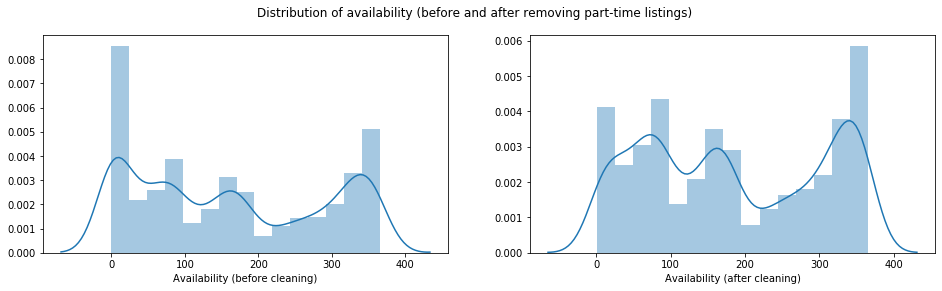

In [358]:
#Distribution of availability_365
%matplotlib inline

fig, axs = plt.subplots(ncols=2, figsize=(16, 4))
fig.suptitle('Distribution of availability (before and after removing part-time listings)')

# Before cleaning
x_axis=data_set['Availability_365'].dropna()
sns.distplot(pd.Series(x_axis, name='Availability (before cleaning)'), ax=axs[0])

# Remove where availability less than 60 days or greater than 300 days
data_set = data_set.query('1 <= Availability_365 <= 365')
print("Dataset has {} rows, {} columns.".format(*data_set.shape))

#After cleaning
x_axis=data_set['Availability_365'].dropna()
sns.distplot(pd.Series(x_axis, name='Availability (after cleaning)'), ax=axs[1])
# data_set = data_set.drop('Availability_365', axis = 1)
print("Dataset has {} rows, {} columns.".format(*data_set.shape))


'\n# Remove where Accommodates > 8\ncondition = data_set[data_set[\'Accommodates\'] > 9]\nrows_to_drop = condition.index\nprint("You dropped {} rows.".format(condition.shape[0]))\ndata_set = data_set.drop(rows_to_drop, axis=0)\nprint("Dataset has {} rows, {} columns.".format(*data_set.shape))\n\n#After cleaning\nx_axis=data_set[\'Accommodates\'].dropna()\nsns.distplot(pd.Series(x_axis, name=\'Max guests (after cleaning)\'), ax=axs[1])\n'

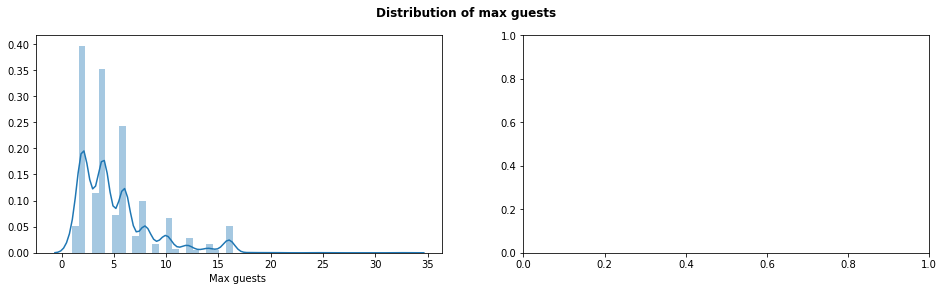

In [307]:
#Distribution of Accommodates
%matplotlib inline

fig, axs = plt.subplots(ncols=2, figsize=(16, 4))
fig.suptitle('Distribution of max guests ', weight='bold', fontsize=12)

# Before cleaning
x_axis=data_set['Accommodates'].dropna()
sns.distplot(pd.Series(x_axis, name='Max guests '), ax=axs[0])
"""
# Remove where Accommodates > 8
condition = data_set[data_set['Accommodates'] > 9]
rows_to_drop = condition.index
print("You dropped {} rows.".format(condition.shape[0]))
data_set = data_set.drop(rows_to_drop, axis=0)
print("Dataset has {} rows, {} columns.".format(*data_set.shape))

#After cleaning
x_axis=data_set['Accommodates'].dropna()
sns.distplot(pd.Series(x_axis, name='Max guests (after cleaning)'), ax=axs[1])
"""

In [275]:
# data_set['Price'] = data_set['Price'] + data_set['Cleaning_fee']

In [359]:
data_set['Price'].value_counts()

10080.0    133
150.0       76
175.0       73
200.0       72
1099.0      71
          ... 
1680.0       1
446.0        1
732.0        1
362.0        1
1799.0       1
Name: Price, Length: 820, dtype: int64

In [360]:
data_set.shape

(6285, 21)

In [364]:
data_set['Price'].describe()

count     5947.000000
mean       676.336977
std       1837.746350
min         19.000000
25%        130.000000
50%        219.000000
75%        408.000000
max      10145.000000
Name: Price, dtype: float64

In [311]:
130-1.5*(408-130),408+1.5*(408-130)

(-287.0, 825.0)

In [312]:
Q75_price, Q25_price = np.percentile(data_set['Price'], [75 ,25])
IQR_price = Q75_price - Q25_price
Lower_limit_price= Q25_price-1.5*IQR_price
Upper_limit_price= Q75_price+1.5*IQR_price
for j in range(len(data_set['Price'])):
    if data_set['Price'].iloc[j] >= Lower_limit_price and data_set['Price'].iloc[j] <= Upper_limit_price:
        data_set['Price'].iloc[j]=data_set['Price'].iloc[j]
    else:
        data_set['Price'].iloc[j]=0  

In [369]:
Q25_price=np.quantile(data_set['Price'],0.55)
Q25_price


C:\ProgramData\Anaconda3\lib\site-packages\numpy\lib\function_base.py:3826: RuntimeWarning: Invalid value encountered in percentile
  interpolation=interpolation)


nan

In [371]:
data_set['Price'].dropna()

4       139.0
5       125.0
6       400.0
7       630.0
10      195.0
        ...  
7159    140.0
7160    102.0
7161     68.0
7162    320.0
7164    170.0
Name: Price, Length: 5947, dtype: float64

In [372]:
data_set['Price'].isna().sum()

338

In [375]:
data_set['Price'].describe()

count     5947.000000
mean       676.336977
std       1837.746350
min         19.000000
25%        130.000000
50%        219.000000
75%        408.000000
max      10145.000000
Name: Price, dtype: float64

You dropped 6285 rows.
Dataset has 0 rows, 20 columns.


C:\ProgramData\Anaconda3\lib\site-packages\statsmodels\nonparametric\kde.py:487: RuntimeWarning: invalid value encountered in true_divide
  binned = fast_linbin(X, a, b, gridsize) / (delta * nobs)
C:\ProgramData\Anaconda3\lib\site-packages\statsmodels\nonparametric\kdetools.py:34: RuntimeWarning: invalid value encountered in double_scalars
  FAC1 = 2*(np.pi*bw/RANGE)**2
C:\ProgramData\Anaconda3\lib\site-packages\seaborn\distributions.py:198: RuntimeWarning: Mean of empty slice.
  line, = ax.plot(a.mean(), 0)
C:\ProgramData\Anaconda3\lib\site-packages\numpy\core\_methods.py:85: RuntimeWarning: invalid value encountered in double_scalars
  ret = ret.dtype.type(ret / rcount)
C:\ProgramData\Anaconda3\lib\site-packages\numpy\lib\histograms.py:893: RuntimeWarning: invalid value encountered in true_divide
  return n/db/n.sum(), bin_edges


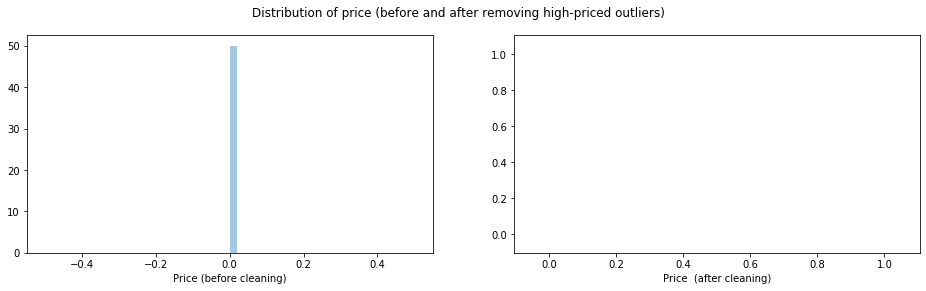

In [314]:
#Distribution of price
%matplotlib inline

fig, axs = plt.subplots(ncols=2, figsize=(16, 4))
fig.suptitle('Distribution of price (before and after removing high-priced outliers)')

# Before cleaning
x_axis=data_set['Price'].dropna()
sns.distplot(pd.Series(x_axis, name='Price (before cleaning)'), ax=axs[0])

# Remove where price > 1000
condition = data_set[data_set['Price'] <1]
rows_to_drop = condition.index
print("You dropped {} rows.".format(condition.shape[0]))
data_set = data_set.drop(rows_to_drop, axis=0)
print("Dataset has {} rows, {} columns.".format(*data_set.shape))

#After cleaning
x_axis=data_set['Price'].dropna()
sns.distplot(pd.Series(x_axis, name='Price  (after cleaning)'), ax=axs[1])

In [114]:
data_set['Price'].describe()

count    5486.000000
mean      153.195771
std       113.157189
min        10.000000
25%        75.000000
50%       119.000000
75%       199.000000
max       515.000000
Name: Price, dtype: float64

In [115]:
data_set['Bed_type'].value_counts()

Real Bed         5444
Futon              19
Airbed             14
Pull-out Sofa       9
Name: Bed_type, dtype: int64

In [116]:
categories_to_rename = ['Pull-out Sofa', 'Futon', 'Airbed']
data_set['Bed_type'].loc[data_set['Bed_type'].isin(categories_to_rename)] = 'Non-Real Bed'

C:\ProgramData\Anaconda3\lib\site-packages\pandas\core\indexing.py:205: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: http://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  self._setitem_with_indexer(indexer, value)


In [117]:
data_set['Bed_type'].value_counts()

Real Bed        5444
Non-Real Bed      42
Name: Bed_type, dtype: int64

In [118]:
data_set.head(2)

,Listing_id,Room_type,Accommodates,Guests_included,Bathrooms,Bedrooms,Beds,Bed_type,Host_is_superhost,Square_feet,...,Extra_people,Minimum_nights,Maximum_nights,Availability_365,Reviews_per_month,Tv,Wifi,Air conditioning,Free parking on premises,Heating
1,5456,Entire home/apt,3,2,1.0,0.0,0.0,Real Bed,t,0.0,...,45.0,2,90,334,4.500000,1,1,1,0,1
2,5769,Private room,2,2,1.0,0.0,0.0,Real Bed,t,0.0,...,0.0,1,14,14,2.428571,1,1,1,1,1


You dropped 0 rows.
Dataset has 5486 rows, 22 columns.


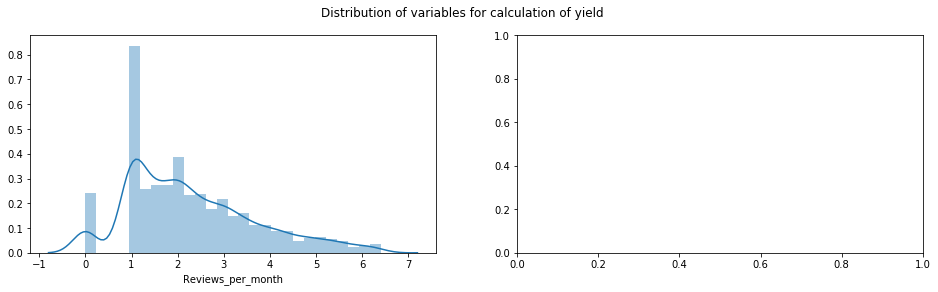

In [119]:
#Distribution of Reviews_per_month
%matplotlib inline

fig, axs = plt.subplots(ncols=2, figsize=(16, 4))
fig.suptitle('Distribution of variables for calculation of yield')


# removing listing with morethan 20 reviews per month
condition = data_set[data_set['Reviews_per_month'] <0]
rows_to_drop = condition.index
print("You dropped {} rows.".format(condition.shape[0]))
data_set = data_set.drop(rows_to_drop, axis=0)
print("Dataset has {} rows, {} columns.".format(*data_set.shape))


x_axis=data_set['Reviews_per_month'].dropna()
sns.distplot(pd.Series(x_axis, name=x_axis.name), ax=axs[0])

In [120]:
data_set.columns

Index(['Listing_id', 'Room_type', 'Accommodates', 'Guests_included',
       'Bathrooms', 'Bedrooms', 'Beds', 'Bed_type', 'Host_is_superhost',
       'Square_feet', 'Price', 'Cleaning_fee', 'Extra_people',
       'Minimum_nights', 'Maximum_nights', 'Availability_365',
       'Reviews_per_month', 'Tv', 'Wifi', 'Air conditioning',
       'Free parking on premises', 'Heating'],
      dtype='object')

In [121]:
data_set.shape

(5486, 22)

In [122]:
avg_length_of_stay_austin = 3
review_rate = 0.5

In [123]:
# calculate the occupancy and round the result
data_set['Occupancy'] = round(avg_length_of_stay_austin * (data_set['Reviews_per_month']/review_rate), 2)

# occupancy cannot be greater than 100% - are there any mistakes?
len(data_set[data_set['Occupancy'] > 100])

0

In [124]:
# droping occupancy rates > 100
# data_set.drop(data_set[(data_set['Occupancy'] > 75)].index, axis=0, inplace=True)

# check the distribution
data_set['Occupancy'].describe()

count    5486.000000
mean       13.783086
std         8.442217
min         0.000000
25%         6.000000
50%        12.000000
75%        18.600000
max        38.400000
Name: Occupancy, dtype: float64

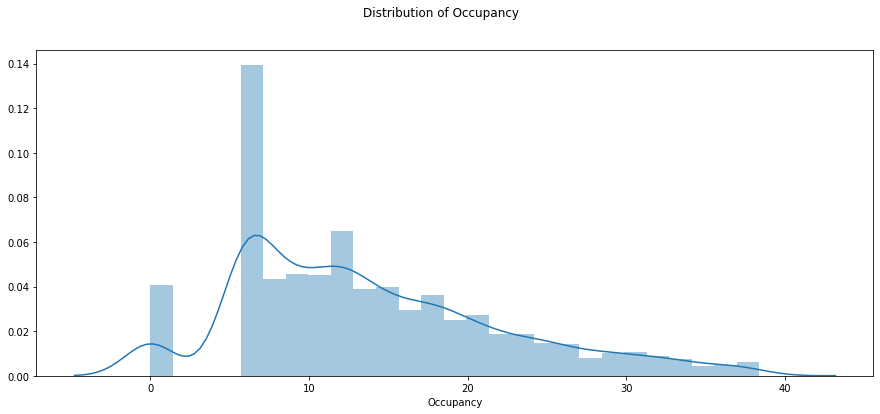

In [125]:
%matplotlib inline
fig, ax = plt.subplots(figsize=(15,6))
fig.suptitle('Distribution of Occupancy')
x_axis = data_set['Occupancy'].dropna()
x = pd.Series(x_axis, name=x_axis.name)
ax = sns.distplot(x)

In [126]:
# Calculate yield

# Average length of stay (by city) X Price ('price') X No. of reviews('reviews_per_month') / Review rate('50%') 

cols_to_drop = ['Cleaning_fee']
data_set = data_set.drop(cols_to_drop, axis = 1)
print("Dataset has {} rows, {} columns.".format(*data_set.shape))

data_set['Yield'] = data_set['Occupancy'] * data_set['Price'] *12
data_set.Yield.describe()


Dataset has 5486 rows, 22 columns.


count      5486.000000
mean      24521.397988
std       23554.252882
min           0.000000
25%        8928.000000
50%       18395.400000
75%       32400.000000
max      222984.000000
Name: Yield, dtype: float64

In [127]:
data_set.head(3)

,Listing_id,Room_type,Accommodates,Guests_included,Bathrooms,Bedrooms,Beds,Bed_type,Host_is_superhost,Square_feet,...,Maximum_nights,Availability_365,Reviews_per_month,Tv,Wifi,Air conditioning,Free parking on premises,Heating,Occupancy,Yield
1,5456,Entire home/apt,3,2,1.0,0.0,0.0,Real Bed,t,0.0,...,90,334,4.500000,1,1,1,0,1,27.00,30780.00
2,5769,Private room,2,2,1.0,0.0,0.0,Real Bed,t,0.0,...,14,14,2.428571,1,1,1,1,1,14.57,6993.60
4,6448,Entire home/apt,3,2,1.0,0.0,0.0,Real Bed,t,0.0,...,365,127,2.888889,1,1,1,1,1,17.33,28906.44


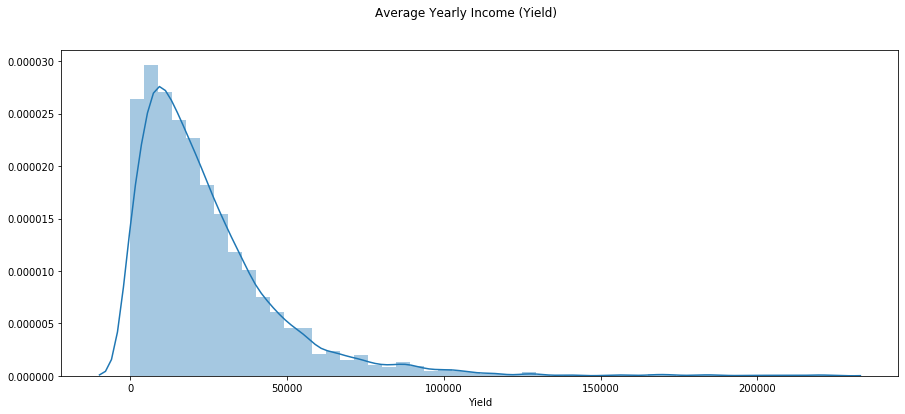

In [128]:
%matplotlib inline
fig, ax = plt.subplots(figsize=(15,6))
fig.suptitle('Average Yearly Income (Yield)')
x_axis = data_set['Yield'].dropna()
x = pd.Series(x_axis, name=x_axis.name)
ax = sns.distplot(x)

In [129]:
data_set.isnull().values.any()

False

In [132]:
from sklearn.base import TransformerMixin

class DataFrameImputer(TransformerMixin):

    def __init__(self):
        """Impute missing values.

        Columns of dtype object are imputed with the most frequent value 
        in column.

        Columns of other types are imputed with mean of column.

        """
    def fit(self, X, y=None):

        self.fill = pd.Series([X[c].value_counts().index[0]
            if X[c].dtype == np.dtype('O') else X[c].mean() for c in X],
            index=X.columns)

        return self

    def transform(self, X, y=None):
        return X.fillna(self.fill)

In [130]:
(data_set.isnull().sum())/data_set.shape[0]

Listing_id                  0.0
Room_type                   0.0
Accommodates                0.0
Guests_included             0.0
Bathrooms                   0.0
Bedrooms                    0.0
Beds                        0.0
Bed_type                    0.0
Host_is_superhost           0.0
Square_feet                 0.0
Price                       0.0
Extra_people                0.0
Minimum_nights              0.0
Maximum_nights              0.0
Availability_365            0.0
Reviews_per_month           0.0
Tv                          0.0
Wifi                        0.0
Air conditioning            0.0
Free parking on premises    0.0
Heating                     0.0
Occupancy                   0.0
Yield                       0.0
dtype: float64

In [134]:
data_set.columns

Index(['Listing_id', 'Room_type', 'Accommodates', 'Guests_included',
       'Bathrooms', 'Bedrooms', 'Beds', 'Bed_type', 'Host_is_superhost',
       'Price', 'Extra_people', 'Minimum_nights', 'Maximum_nights',
       'Availability_365', 'Reviews_per_month', 'Tv', 'Wifi',
       'Air conditioning', 'Free parking on premises', 'Heating', 'Occupancy',
       'Yield'],
      dtype='object')

In [135]:
"""
cols_to_drop = ['Reviews_per_month','Occupancy']
df_final_viz = data_set[cols_to_drop]
data_set = data_set.drop(cols_to_drop, axis = 1)
print("Dataset has {} rows, {} columns.".format(*data_set.shape))
"""

'\ncols_to_drop = [\'Reviews_per_month\',\'Occupancy\']\ndf_final_viz = data_set[cols_to_drop]\ndata_set = data_set.drop(cols_to_drop, axis = 1)\nprint("Dataset has {} rows, {} columns.".format(*data_set.shape))\n'

In [136]:
data_set.to_csv(r'C:\\Users\\Sathish Reddy\\Desktop\\R-project\\working_dr\\with_out-dummy-linear_regression_model.csv')

In [137]:

# Dummy encoding
categorical_feats = ['Room_type','Host_is_superhost']
data_set = pd.get_dummies(data_set, columns=categorical_feats, drop_first=False)
print("Dataset has {} rows, {} columns.".format(*data_set.shape))

Dataset has 5486 rows, 26 columns.


In [138]:
data_set.head(3)

,Listing_id,Accommodates,Guests_included,Bathrooms,Bedrooms,Beds,Bed_type,Price,Extra_people,Minimum_nights,...,Free parking on premises,Heating,Occupancy,Yield,Room_type_Entire home/apt,Room_type_Hotel room,Room_type_Private room,Room_type_Shared room,Host_is_superhost_f,Host_is_superhost_t
1,5456,3,2,1.0,0.0,0.0,Real Bed,95.0,45.0,2,...,0,1,27.00,30780.00,1,0,0,0,0,1
2,5769,2,2,1.0,0.0,0.0,Real Bed,40.0,0.0,1,...,1,1,14.57,6993.60,0,0,1,0,0,1
4,6448,3,2,1.0,0.0,0.0,Real Bed,139.0,25.0,3,...,1,1,17.33,28906.44,1,0,0,0,0,1


In [387]:
# Create response and target variable
target = ['Yield','Listing_id', 'Neighbourhood']
X = data_set.drop(target, axis=1)
y = data_set['Yield']

In [400]:

# Train test split
test_size = 0.2

X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=test_size, random_state=1223)

In [401]:
from sklearn import linear_model
from sklearn.metrics import mean_squared_error, r2_score

In [402]:
# Create linear regression object
regr = linear_model.LinearRegression()

# Train the model using the training sets
regr.fit(X_train, y_train)

LinearRegression(copy_X=True, fit_intercept=True, n_jobs=None, normalize=False)

In [403]:
# Make predictions using the testing set
regr_y_pred = regr.predict(X_test)

# The mean squared error
print("Mean squared error: %.2f" % mean_squared_error(y_test, regr_y_pred))
# Explained variance score: 1 is perfect prediction
print('Variance score: %.2f' % r2_score(y_test, regr_y_pred))

Mean squared error: 526821691.75
Variance score: 0.36


In [404]:
data_set.shape

(2461, 45)

In [399]:
data_set.to_csv(r'C:\\Users\\Sathish Reddy\\Desktop\\R-project\\working_dr\\lm_on_Final_dataset.csv')